# Assignment 3
### Due 9/23. Do four of five.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Question 1 
- Open the NHANES (or Ames prices or college completion datasets, if you prefer)
- Find two categorical variables of interest (there are 198, and short descriptions are given in the `nhanes_meta_17_18.csv` file). Investigate their missing values (you don't have to focus on missing values for this analysis like we did with police use of force, but always be aware of how dirty the data are)
- Compute a contingency table for your categorical $X$ and $Y$
- Discuss any interesting patterns (or lack of one) that you observe

In [2]:
data = pd.read_csv(r"C:\Users\crush\OneDrive\Desktop\DS 5030\assignment1\data\nhanes_data_17_18.csv")

C:\Users\crush\AppData\Local\Temp\ipykernel_10020\920940444.py:1: DtypeWarning: Columns (142) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r"C:\Users\crush\OneDrive\Desktop\DS 5030\assignment1\data\nhanes_data_17_18.csv")


In [3]:
# investigate missing values

print(f"Missing Values for Diet: {data["HowHealthyIsTheDiet"].isna().sum()}")
print(f"Missing Values for Milk: {data['Past30DayMilkProductConsumption'].isna().sum()}")

Missing Values for Diet: 2540
Missing Values for Milk: 1


In [4]:
# contingency table from notes
pd.crosstab(data['Past30DayMilkProductConsumption'], data['HowHealthyIsTheDiet'],normalize='index')

HowHealthyIsTheDiet,Excellent,Fair,Good,Poor,Very good
Past30DayMilkProductConsumption,,,,,
Never,0.086739,0.256047,0.376147,0.078399,0.202669
Often-once a day or more?,0.093381,0.243499,0.389480,0.060284,0.213357
Rarely-less than once a week,0.054795,0.290894,0.394037,0.078163,0.182111
Sometimes-once a week or more but less than once a day or,0.064555,0.277944,0.403467,0.059773,0.194262
Varied,0.047619,0.333333,0.428571,0.095238,0.095238


**Pattern:** According to this contingency table, a "Good" diet seems to be the most common observation no matter the milk consumption over the past 30 days. Moreover, a "Fair" diet is in second place no matter the milk consumption habits of the respondent. One thing that deviates from a pattern is the percentage of observations that have both "Varied" milk consumption and a "Very Good" diet. Generally, no matter the milk consumption, the fraction of onbservations also having a "Very Good" diet is approxiamtely 1 in 5. However, for "Varied" milk consumption, the proportion of "Very Good" diets is half of that, at 10%. There also seems to be a trend that for respondents with "Varied" milk consumption, they tend to rate their diet more negatively with the "Varied" category being the highest in "Poor" and lowest in "Excellent" and "Very Good". Most importantly, there doesn't seem to be any difference in the respondent's diet when their milk consumption is "Often" or "Never."

## Question 2
- Open the NHANES dataset
- Find a categorical and numeric variable of interest (there are 198, and short descriptions are given in the `nhanes_meta_17_18.csv` file). Investigate their missing values (you don't have to focus on missing values for this analysis, but always be aware of them)
- Make descriptive tables and grouped kernel density plots to represent the variation in your numeric $Y$ conditional on your categorical $X$
- Discuss any interesting patterns (or lack of one) that you observe

In [5]:
# investigate msising values

print(f"Missing Values for Diet: {data['HowHealthyIsTheDiet'].isna().sum()}")
print(f"Missing Values for Protein: {data['ProteinGm_DR1TOT'].isna().sum()}")

Missing Values for Diet: 2540
Missing Values for Protein: 1081


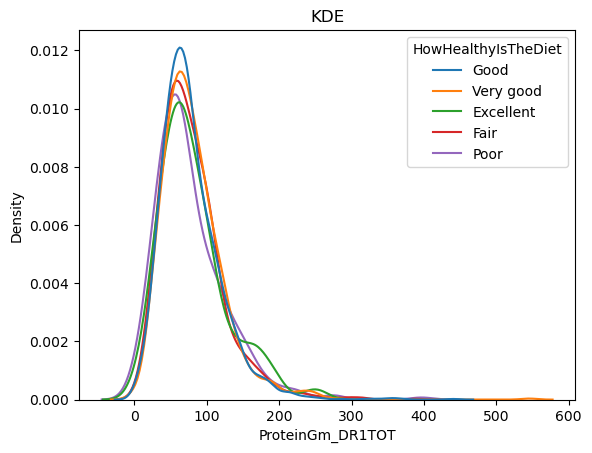

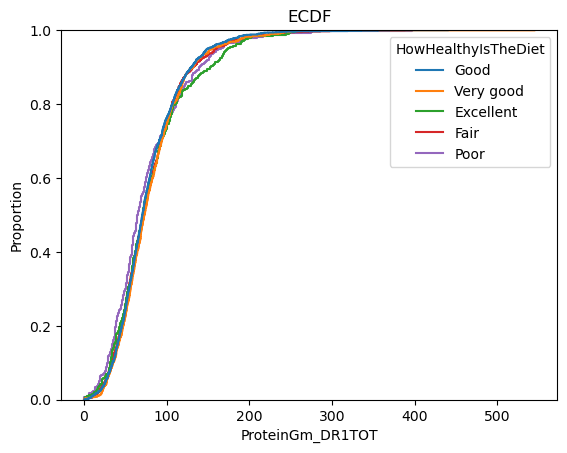

ProteinGm_DR1TOT                                      \
                               count       mean        std           min   
HowHealthyIsTheDiet                                                        
Excellent                      382.0  81.357723  47.419428  1.000000e-02   
Fair                          1415.0  79.399915  43.784826  1.260000e+00   
Good                          2060.0  78.215786  41.874081  2.000000e-01   
Poor                           367.0  77.062997  49.000278  5.397605e-79   
Very good                     1039.0  80.763494  43.524399  5.397605e-79   

                                                       
                         25%    50%       75%     max  
HowHealthyIsTheDiet                                    
Excellent            49.8100  71.07  102.5550  263.12  
Fair                 50.0000  71.81   99.5750  388.21  
Good                 50.8225  70.66   97.7875  440.73  
Poor                 44.8600  64.91  100.3450  396.61  
Very good            52.0400  73.14  100.6850  545.20

In [6]:
# class code

conditioner = 'HowHealthyIsTheDiet'
sns.kdeplot( data=data, x='ProteinGm_DR1TOT', hue=conditioner, common_norm=False ).set(title='KDE')
plt.show()
sns.ecdfplot( data=data, x='ProteinGm_DR1TOT', hue=conditioner).set(title='ECDF')
plt.show()
data.loc[:,['ProteinGm_DR1TOT', conditioner]].groupby(conditioner).describe()

**Pattern:** Based on the graphs, protein intake distributions are very similar across diet groups. This visual assumption is confirmed by the table that shows the groups' mean and standard deviations are very similar. THere doesn't seem to be a pattern between the two variables where one diet catgeory is correlated with protein intake.

## Question 3 
We showed that the mean and median could be discovered by minimizing various kinds of loss functions; this is what machine learning is. To make a prediction $\hat{y}(z)$ of $Y$ when $X=z$, minimize the mean squared error:
$$
MSE(\hat{y}(z)) = \dfrac{1}{N} \sum_{i=1}^N \left\lbrace y_i - \hat{y}(z) \right\rbrace^2 \frac{1}{h}k\left(\frac{z-x_i}{h}\right)
$$
Show that the solution to this problem is the LCLS/Naradaya-Watson estimator.

## Question 4
- Write a class or set of functions that implement the LCLS/Naradaya-Watson estimator, using the Silverman plug-in estimate for the conditioning variable $X$ as the bandwidth.
- From one of the course data sets, find two numeric variables of interest, analyze their relationship with the the LCLS/Naradaya-Watson estimator, and discuss your results.

In [46]:
def silverman_bandwidth(x):
    x = pd.Series(x).dropna()
    iqr = np.quantile(x,.75) - np.quantile(x,.25)
    h = 0.9 * min(np.std(x), iqr/1.34) * len(x) **(-0.2)
    return h

def gaussian_kernel(x, h, matrix):
    I = -(x.to_numpy().reshape(-1,1)-matrix.reshape(1,-1) )**2
    K = np.exp(I/(2*h**2) )/np.sqrt(2*np.pi*h**2 )
    return K

def lcls(x, y, h, K, plot=True, dot_color='black', line_color = 'red'):
    n = len(x) # Number of observations
    grid = np.sort(x.unique()) # Extract and sort unique values for x

    numerator = y@K # Compute the numerator
    denominator = np.sum(K,axis=0) # Compute denominator
    y_hat = numerator/denominator # Compute estimator

    # Plot results:
    if plot:
        sns.scatterplot(data=data, y=y, x=x,alpha=.25, color=dot_color)
        sns.lineplot(x=grid,y=y_hat, color=line_color)

    return y_hat, grid, h



0.05990308273871034


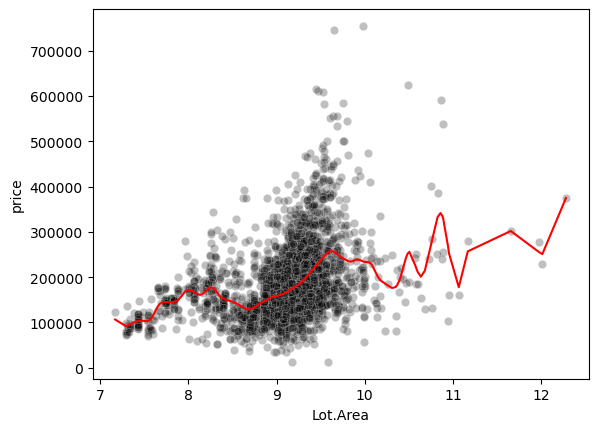

In [47]:
df = pd.read_csv(r"C:\Users\crush\OneDrive\Desktop\DS 5030\assignment1\data\ames_prices.csv")

x = np.log(df["Lot.Area"])
y = df["price"]

matrix = np.sort(x.unique()) # Extract and sort unique values for x
h = silverman_bandwidth(x)
K = gaussian_kernel(x, h, matrix)

yhat, grid, h_graph = lcls(x, y, h, K=K)
print(h_graph)


0.2


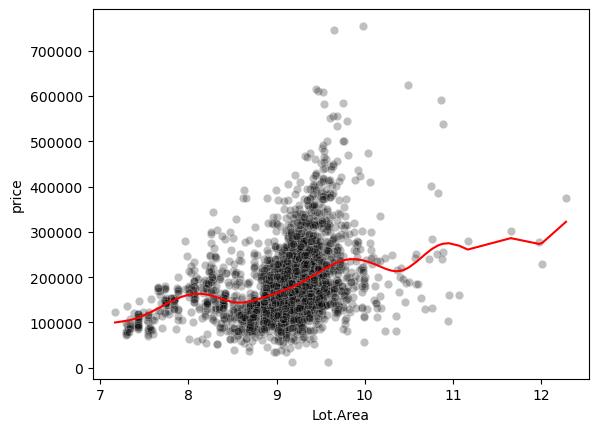

In [49]:
matrix = np.sort(x.unique()) # Extract and sort unique values for x
h = .2
K = gaussian_kernel(x, h, matrix)

yhat, grid, h_graph = lcls(x, y, h, K=K)
print(h_graph)

**Analysis:** According to my graph I created using the LCLS predictor, price and lot area have a relatively positive relationship, meaning the larger the lot area, the pricier the home. Moreover, as the lot size increases, the distribution of price expands drastically indicating heteroskedasticity. Also, the silverman bandwidth of 0.06 leads to a slightly jagged line. A smoother line can be accomplished by increasing the bandwidth to 0.2 as I did in the second plot. In both cases, the CEF is less stable at the extreme end of lot size.

## Question 5
- In any of the available data sets, investigate the relationships between pairs of variables $(X,Y)$ with a scatterplot and CEF (for example, price on area)
- Is this relationship plausibly causal, or are there missing variables that might explain at least part of the relationship between your variables? These can be "conceptual" rather than "practical"; for example, 'talent' or 'grit' probably explain education outcomes, but are almost impossible to measure. We are asking whether there are hypothetical **threats to causal identification** of the effect of $X$ on $Y$.
- Explain how, regardless of the threat to causal identification, you can still use your model to predict $Y$ given $X$, as long as you don't intervene in the system to control the outcome

16.056604415500374


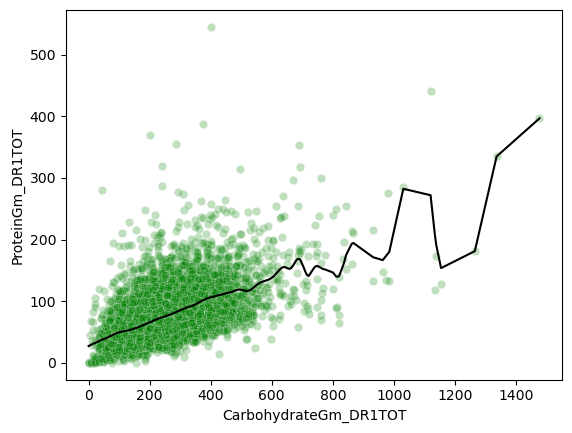

In [56]:
x = data["CarbohydrateGm_DR1TOT"].dropna()
y = data["ProteinGm_DR1TOT"].dropna()

matrix = np.sort(x.unique()) # Extract and sort unique values for x
h = silverman_bandwidth(x)
K = gaussian_kernel(x, h, matrix)


yhat, grid, h_graph = lcls(x, y, h, K=K, plot=True, dot_color="green", line_color="black")
print(h_graph)


**Relationship:** The relationship between carbs and protein is positive, meaning as carbs increase, so does protein. It is also heteroskedastic because the distribution of protein expands slightly as carbs increases. With outliers at high carb values, the CEF curve becomes unstable.

**Causal Relationship:** There are many omitted variables in this graph like total calories and the size of the person (height and weight), so we cannot make any causal inferences based on only these two variables. Since the relationship is positive, this threatens causal identification.

**Prediction:** This curve can still be used for predicting the expected protein given the observed carbs without intervening. However, it should be noted that the predictions for protein will become more scattered (higher variance) as the number of carbs increases.